Most common NP-sequences:

[('(-NONE-,)', 195), ('(DT, NN)', 140), ('(PRP,)', 74), ('(NNP, NNP)', 72), ('(NNP, NNP, NNP)', 65), ('(NNS,)', 63), ('(NNP,)', 55), ('(NN,)', 51), ('(DT, JJ, NN)', 48), ('(QP, -NONE-)', 44)]



Histogram of NP-sequence lengths


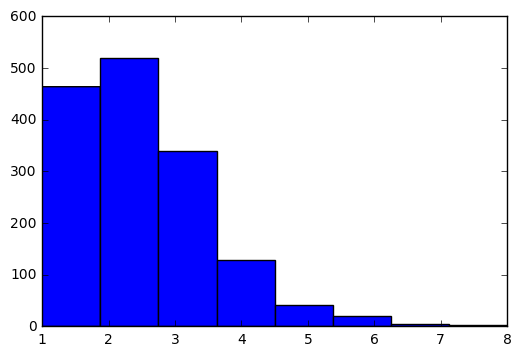

True Positives: 2606
False Positives: 206


In [115]:
from nltk.corpus import treebank
from nltk.tree import Tree
from nltk.tree import ParentedTree
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab



# open questions:
# > should we only look for 'NP' or also for 'NP-SBJ' and so on?


# file ids of the treebank:
fileIds = treebank.fileids()

# list of all non-recursive sequences for NP:
nprhss = []
allrhss = []
lengths = []  
for fileId in fileIds:
    
    tree = treebank.parsed_sents(fileId)[0]
    productions = tree.productions()
    
    for production in productions:
        
        lhs = production.lhs()
        rhs = production.rhs()

        if str(lhs).startswith('NP'):
            # check if rhs is recursive (contains another NP):
            isRecursive = False
            for el in rhs:
                if str(el).startswith('NP'):
                    isRecursive = True
            if  not isRecursive: 
                # only add non-recursive rhs:
                nprhss.append(str(rhs))
                # save rhs lengths for histogram:
                lengths.append(len(rhs))
        
        # add all rhs found to allrhss
        allrhss.append(str(rhs))

npGrammar = Counter(nprhss)
allGrammar = Counter(allrhss)

# create a probabilistic grammar (PCFG) based on relative frequency:
probNpGrammar = Counter()
for rule in npGrammar:
    probNpGrammar[rule] = npGrammar[rule]/len(nprhss)
    
# calculate conditional probabilities P(NP|sequence):
# for any sequence that is a NP at least one:
# (number of times this sequence was a NP) / (number of times this sequence occurred)
probNpGivenSequence = Counter()
for rule in npGrammar:
    # also count the length of the NP-sequences
    probNpGivenSequence[rule] = npGrammar[rule] / allGrammar[rule]

print('Most common NP-sequences:\n')
print(npGrammar.most_common(10))

shortestNpSeq = np.min(lengths)
longestNpSeq = np.max(lengths)
print('\n\n\nHistogram of NP-sequence lengths')
plt.hist(lengths, (longestNpSeq - shortestNpSeq + 1))
plt.show()

# # # # # # # # # # # # # # # # #

truePositives = 0
falsePositives = 0

npProbThreshold = 0.8

for fileId in fileIds:
    tree = treebank.parsed_sents(fileId)[0]
    ptree = ParentedTree.fromstring(str(tree))
    leaves = ptree.leaves()

    poss = []
    for leaf in leaves:
        leafIndex = leaves.index(leaf)
        treeLocation = ptree.leaf_treeposition(leafIndex)
        leaveParent = str(ptree[treeLocation[:-1]]).split(" ")
        pos = leaveParent[0][1:]
        poss.append(pos)

    startPos = 0  
    while startPos < len(poss):
        longestNpLength = 0
        longestNp = None
        for endPos in range(startPos, len(poss)):
            if (endPos - startPos + 1) > longestNpSeq:
                break
            sequence = '(' + poss[startPos]
            if startPos == endPos:
                sequence = sequence + ','
            else:
                for seqPos in range(startPos+1, endPos +1):
                    sequence = sequence + ', ' + poss[seqPos]
            sequence = sequence + ')'
            if probNpGivenSequence[sequence] > npProbThreshold:
                longestNpLength = endPos - startPos
                longestNp = sequence
                longestNpLeaves = leaves[startPos:endPos+1]
                longesNpProb = probNpGivenSequence[sequence]
        # TODO: comment next line?
        startPos = startPos + longestNpLength
        startPos = startPos + 1
        if longestNp != None:
            correctlyChunked = True
            for leaf in longestNpLeaves:
                leafIndex = leaves.index(leaf)
                treeLocation = ptree.leaf_treeposition(leafIndex)
                leaveParent = str(ptree[treeLocation[:-2]]).split(" ")
                pos = leaveParent[0][1:]
                if not str(pos).startswith('NP'):
                    correctlyChunked = False
            if correctlyChunked:
                truePositives = truePositives + longestNpLength
            else:
                falsePositives = falsePositives + longestNpLength
        
    
print('True Positives: ' + str(truePositives))   
print('False Positives: ' + str(falsePositives))
        
        
        

        

In [74]:
tup = ('A', 'B')
print(len(tup))

print(tup)

2
('A', 'B')
